In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from astropy.table import Table
import exoplanet as xo

In [6]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
file = 'tess2019198215352-s0014-0000000273589987-0150-s_lc.fits'

tbl = Table.read(file, format='fits')

q = tbl['QUALITY'] == 0
print(sum(q))

18506


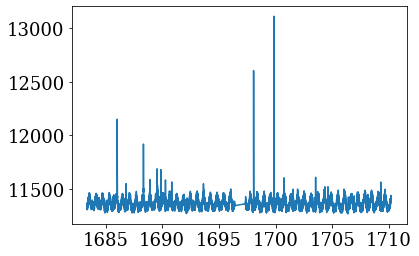

In [4]:
plt.plot(tbl['TIME'][q], tbl['PDCSAP_FLUX'][q])

In [7]:
# final period used in GJ 1243 - Kepler starspot paper
per_orig = 0.5925961953623503

BJD0 = 2454833. # Kepler time zeropoint
TJD0 = 2457000. # TESS time zeropoint

EPHEM = 0.11497024 # used to phase superwasp

In [ ]:
# acf = xo.autocorr_estimator(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q])-1 )

In [ ]:
# lnp = xo.lomb_scargle_estimator(data.time[q], data.psf_flux[q]/np.median(data.psf_flux[q])-1, 
#                                 min_period=0.2, max_period=5)

In [8]:
from lightkurve.search import search_lightcurvefile

In [11]:
lc0 = search_lightcurvefile('9726699', quarter=0, mission='Kepler', cadence='long').download()
kep=lc0.PDCSAP_FLUX
qk = kep.quality == 0

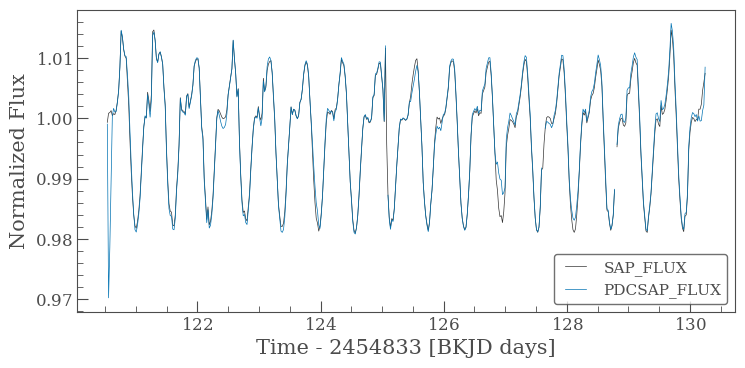

In [10]:
lc0.plot()

In [12]:
from scipy.stats import binned_statistic

def phase_mean(phase, flux, Nbins=100, stat='mean'):
    bins = np.linspace(-0.5, 1.5, Nbins)
    
    cln = np.isfinite(flux)
    ss = np.argsort(phase[cln])

    xd = np.hstack((phase[cln][ss]-1, phase[cln][ss], phase[cln][ss]+1))
    yd = np.hstack((flux[cln][ss], flux[cln][ss], flux[cln][ss]))
    bin_means, bin_edges, binnumber = binned_statistic(xd, yd, statistic=stat, 
                                                       bins=bins)
    bin_centers = (bin_edges[1:] + bin_edges[0:-1])/2
    ok = np.isfinite(bin_means)
    return bin_centers[ok], bin_means[ok]
#     model = np.interp(x_i, bin_centers, bin_means)

In [16]:
def tau(mass): 
    ''' 
    Write up the Eqn 11 from Wright (2011) that gives the
    convective turnover timescale, used in Rossby number calculation (Ro =
    Prot / tau) 
    
    Parameters 
    ---------- 
    mass : float relative to solar 
    
    Returns
    ------- 
    tau (in days) 
    ''' 
    log_tau = 1.16 - 1.49 * np.log10(mass) - 0.54 * np.log10(mass)**2. 
    return 10.**log_tau

tau(0.2)

86.62503244871078

Text(0, 0.5, 'Relative Flux')

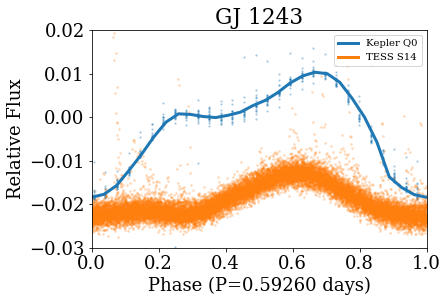

In [24]:

xk = ((kep.time - EPHEM) % per_orig)/per_orig
yk = kep.flux/np.nanmedian(kep.flux) - 1
plt.scatter(xk, yk, s=2, alpha=0.25, c='C0')

xxk,yyk = phase_mean(xk, yk, Nbins=55, stat='median')
plt.plot(xxk,yyk, lw=3, label='Kepler Q0')

# obnoxiously, convert time from TJD into KeplerBJD, so this EPHEM works too
xt = ((tbl['TIME'][q] + TJD0 - BJD0 - EPHEM) % per_orig) / per_orig
yt = tbl['PDCSAP_FLUX'][q]/np.median(tbl['PDCSAP_FLUX'][q])-1
plt.scatter(xt, yt - 0.02, s=3, alpha=0.2,c='C1')

xxt,yyt = phase_mean(xt, yt, Nbins=55, stat='median')
plt.plot(xxt,yyt - 0.02, lw=3, label='TESS S14')



plt.legend(fontsize=10)

plt.xlim(0,1)
plt.ylim(-0.03,0.02)
plt.title('GJ 1243')
plt.xlabel('Phase (P='+format(per_orig,'.5f')+' days)')
plt.ylabel('Relative Flux')

Text(0, 0.5, 'Relative Flux')

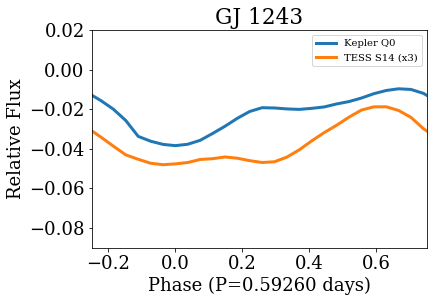

In [25]:
plt.plot(xxk,yyk - 0.02, lw=3, label='Kepler Q0')
plt.plot(xxt,yyt*3 - 0.04, lw=3, label='TESS S14 (x3)')

plt.legend(fontsize=10)

plt.xlim(-0.25,.75)
plt.ylim(-0.09,0.02)
plt.title('GJ 1243')
plt.xlabel('Phase (P='+format(per_orig,'.5f')+' days)')
plt.ylabel('Relative Flux')